Successfully loaded data for 2011.
Successfully loaded data for 2012.
Successfully loaded data for 2013.

Initial Combined DataFrame Head
   Stn Code Sampling Date          State City/Town/Village/Area  \
0       555      1/3/2012  Uttar Pradesh              Allahabad   
1       555      1/5/2012  Uttar Pradesh              Allahabad   
2       555      1/9/2012  Uttar Pradesh              Allahabad   
3       555     1/11/2012  Uttar Pradesh              Allahabad   
4       555    16/01/2012  Uttar Pradesh              Allahabad   

  Location of Monitoring Station                                       Agency  \
0        Bharat Yantra Nigam Ltd  Uttar Pradesh State Pollution Control Board   
1        Bharat Yantra Nigam Ltd  Uttar Pradesh State Pollution Control Board   
2        Bharat Yantra Nigam Ltd  Uttar Pradesh State Pollution Control Board   
3        Bharat Yantra Nigam Ltd  Uttar Pradesh State Pollution Control Board   
4        Bharat Yantra Nigam Ltd  Uttar Pradesh State 

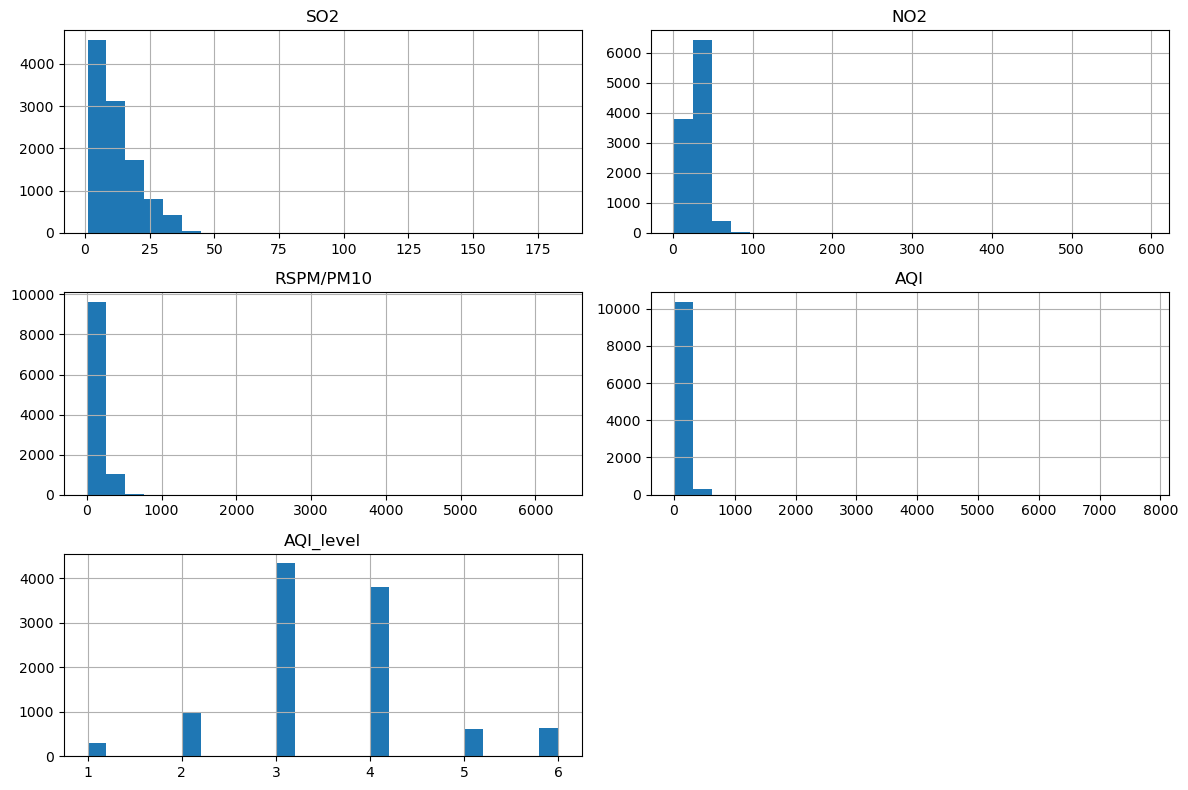


Box Plots of Numerical Features


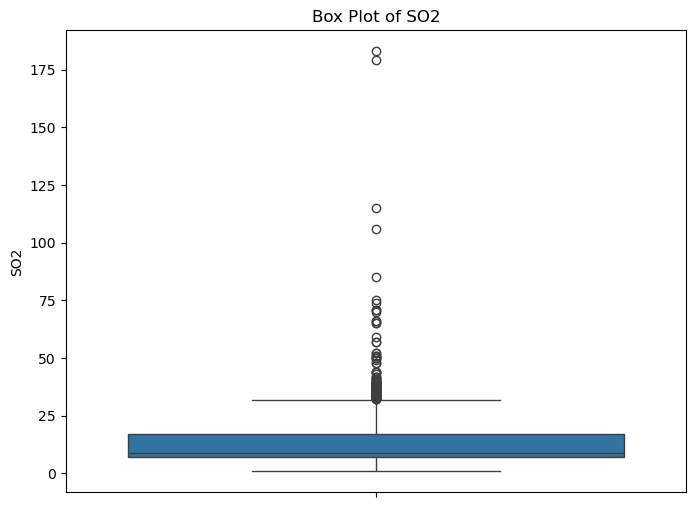

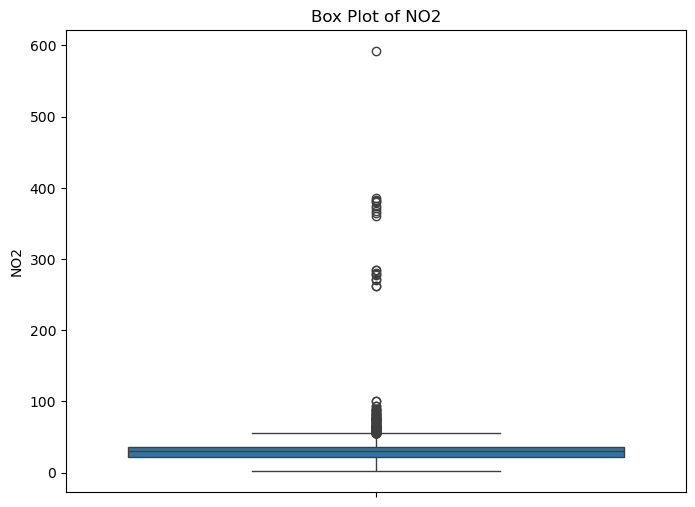

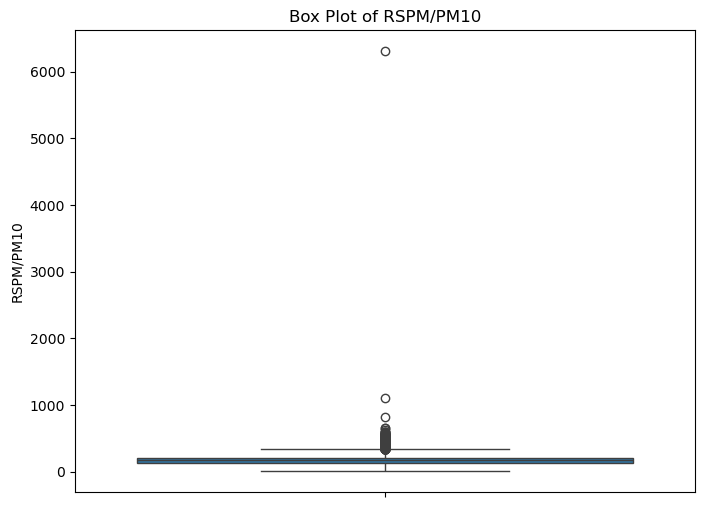

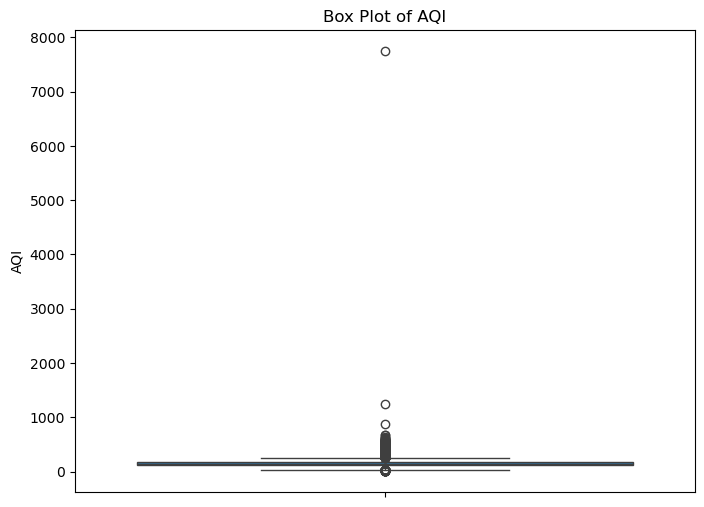


Scatter Plots: Pollutants vs. AQI


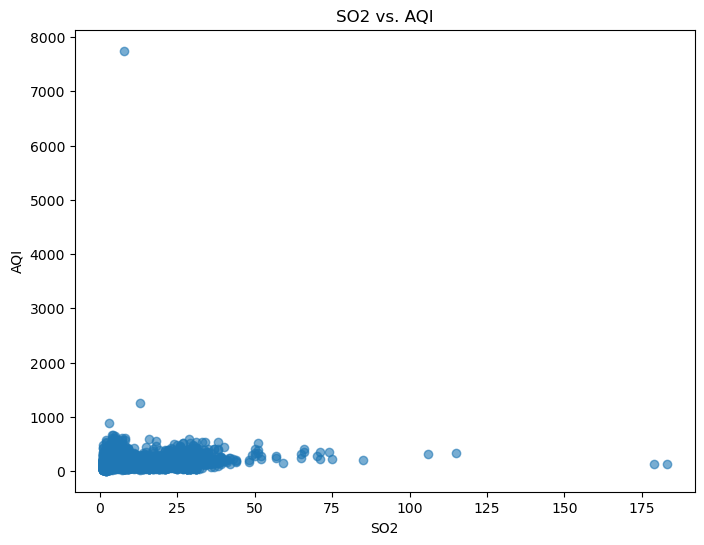

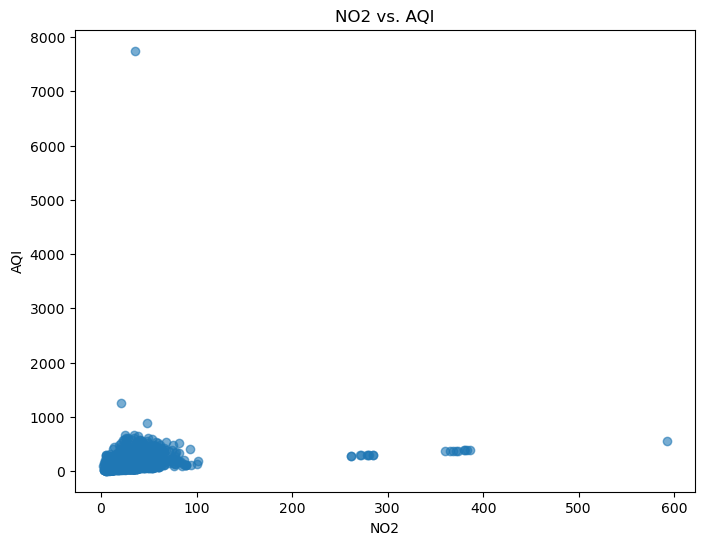

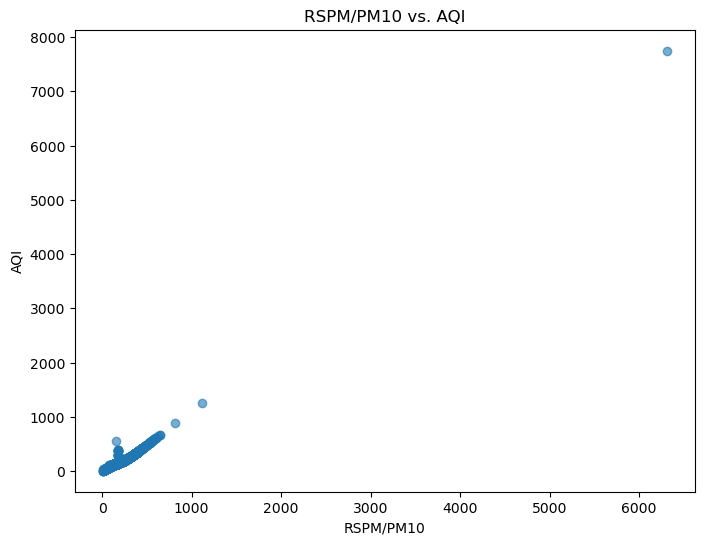


Correlation Heatmap


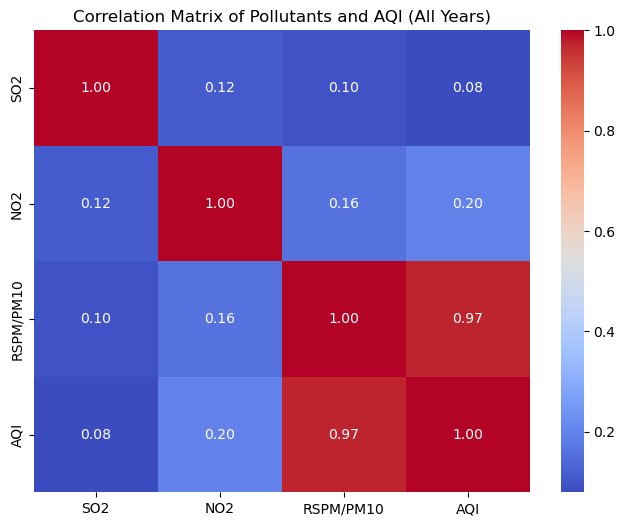


Pair Plot of Key Features


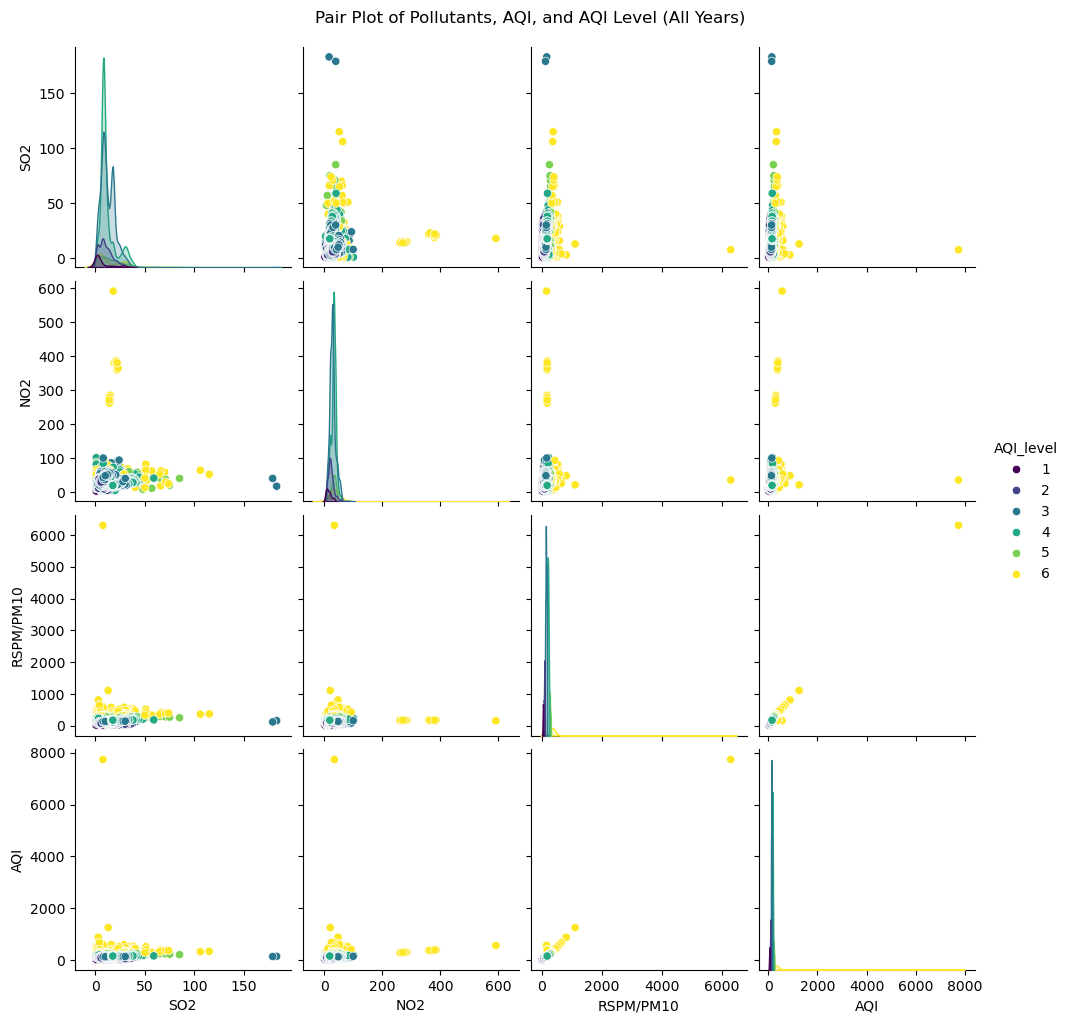


Average AQI Trend Over Years


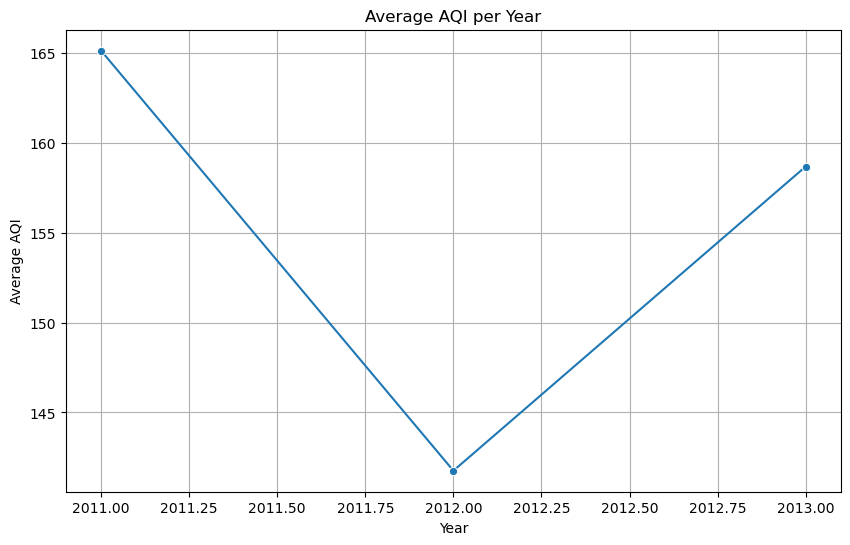


Regression Model: Linear Regression (Predicting AQI)
Linear Regression - MSE: 359.4882
Linear Regression - RMSE: 18.9602
Linear Regression - R2 Score: 0.9096


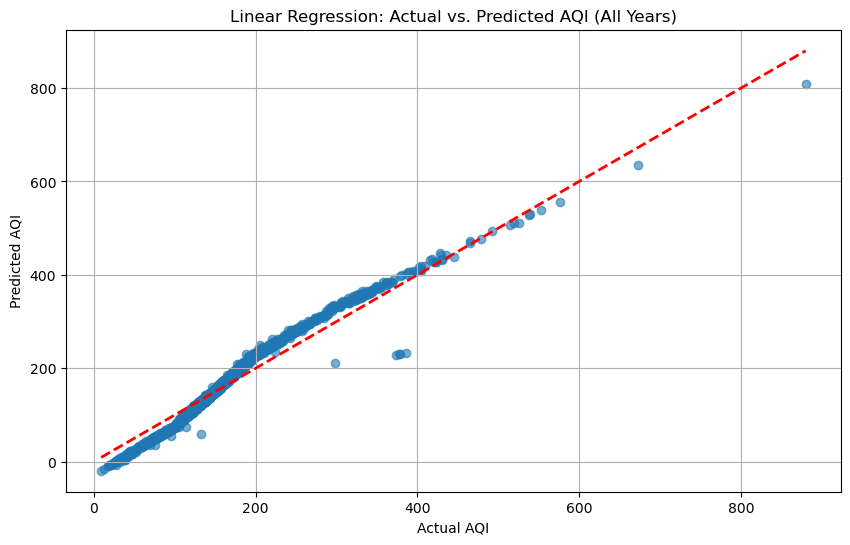


Classification Models (Predicting AQI_level)

Training and Evaluating: Logistic Regression
Accuracy: 0.9579
Precision (weighted): 0.9575
Recall (weighted): 0.9579
F1 Score (weighted): 0.9568

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.80      0.88        59
           2       0.93      0.88      0.91       186
           3       0.98      0.98      0.98       852
           4       0.95      1.00      0.97       788
           5       0.89      0.76      0.82       126
           6       0.97      0.91      0.94       128

    accuracy                           0.96      2139
   macro avg       0.95      0.89      0.92      2139
weighted avg       0.96      0.96      0.96      2139


Confusion Matrix:


c:\Users\akars\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


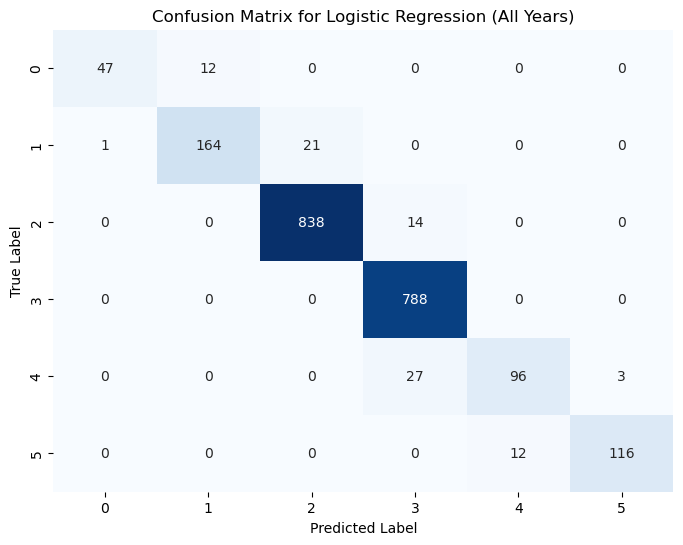


Training and Evaluating: SVM Classifier
Accuracy: 0.9827
Precision (weighted): 0.9829
Recall (weighted): 0.9827
F1 Score (weighted): 0.9827

Classification Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99        59
           2       0.99      0.98      0.98       186
           3       1.00      0.98      0.99       852
           4       0.97      1.00      0.98       788
           5       0.95      0.96      0.96       126
           6       0.98      0.96      0.97       128

    accuracy                           0.98      2139
   macro avg       0.98      0.98      0.98      2139
weighted avg       0.98      0.98      0.98      2139


Confusion Matrix:


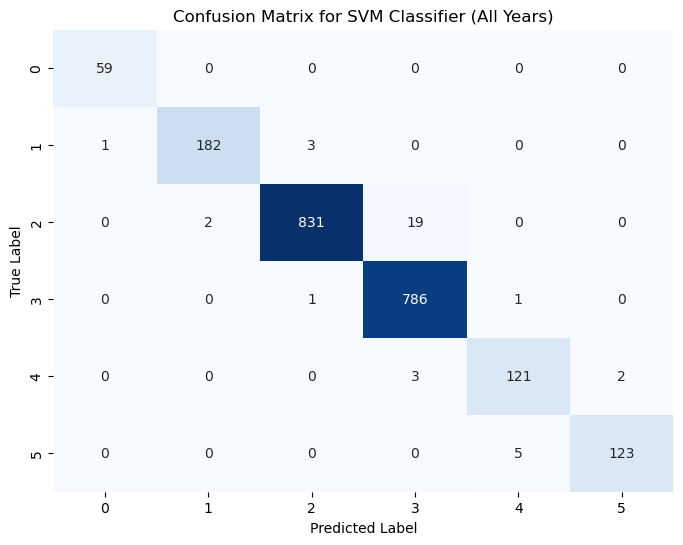


Training and Evaluating: Decision Tree Classifier
Accuracy: 0.9995
Precision (weighted): 0.9995
Recall (weighted): 0.9995
F1 Score (weighted): 0.9995

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      0.99      1.00       186
           3       1.00      1.00      1.00       852
           4       1.00      1.00      1.00       788
           5       1.00      1.00      1.00       126
           6       1.00      1.00      1.00       128

    accuracy                           1.00      2139
   macro avg       1.00      1.00      1.00      2139
weighted avg       1.00      1.00      1.00      2139


Confusion Matrix:


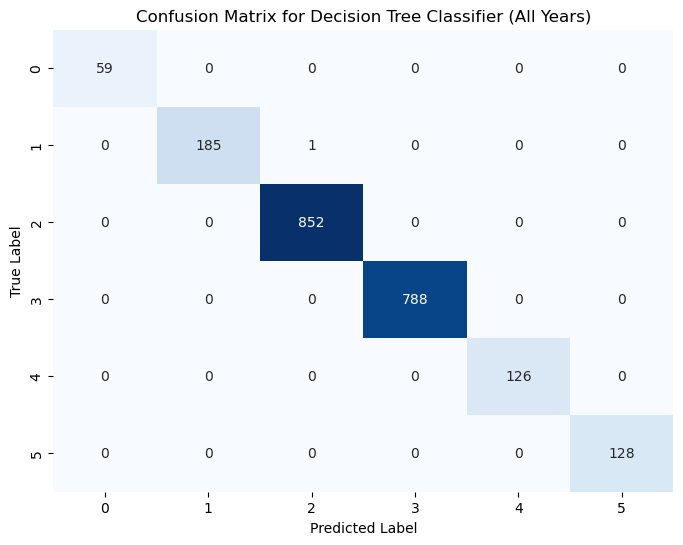


Training and Evaluating: Random Forest Classifier
Accuracy: 0.9991
Precision (weighted): 0.9991
Recall (weighted): 0.9991
F1 Score (weighted): 0.9991

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      0.99      1.00       186
           3       1.00      1.00      1.00       852
           4       1.00      1.00      1.00       788
           5       0.99      1.00      1.00       126
           6       1.00      0.99      1.00       128

    accuracy                           1.00      2139
   macro avg       1.00      1.00      1.00      2139
weighted avg       1.00      1.00      1.00      2139


Confusion Matrix:


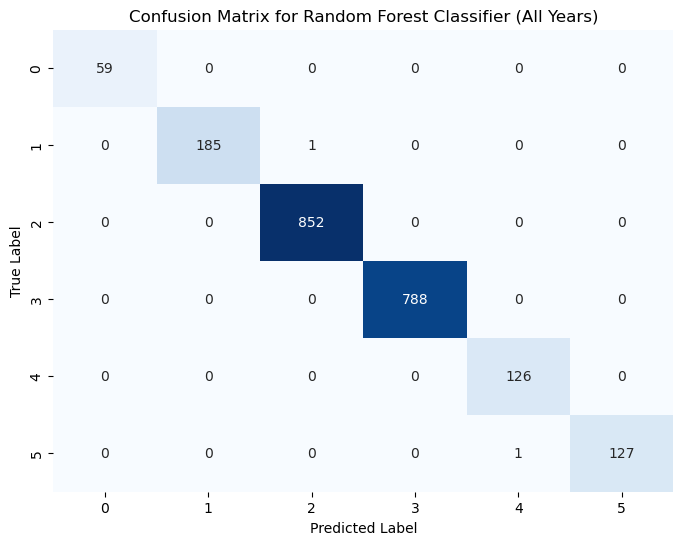


Classification Model Comparison (All Years)
                          Accuracy  Precision    Recall  F1 Score
Logistic Regression       0.957924   0.957485  0.957924  0.956786
SVM Classifier            0.982702   0.982916  0.982702  0.982699
Decision Tree Classifier  0.999532   0.999533  0.999532  0.999532
Random Forest Classifier  0.999065   0.999069  0.999065  0.999064


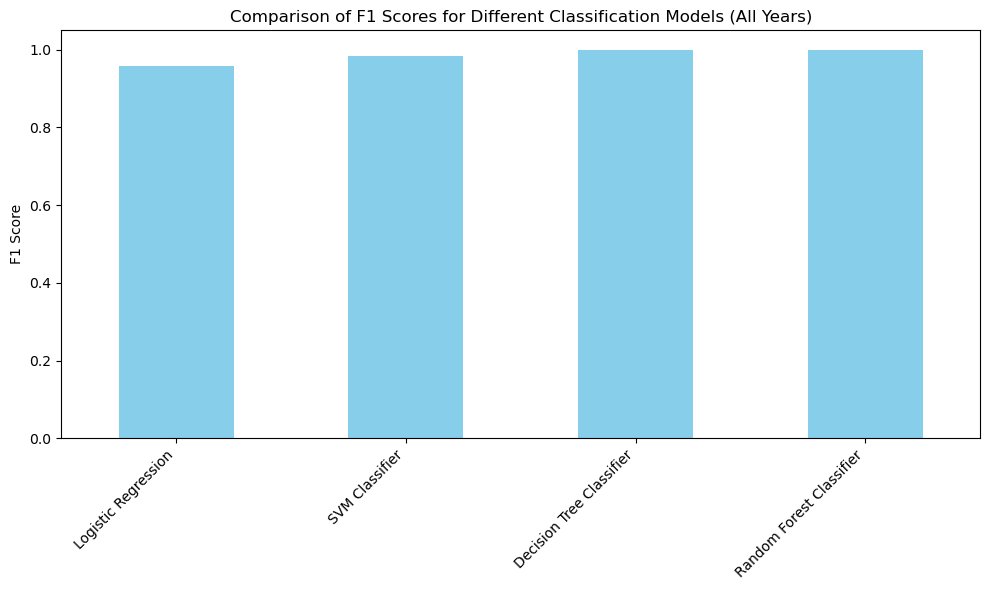


Project Summary
This project involved analyzing air quality data from three consecutive years, predicting AQI values using Linear Regression, and classifying AQI levels using various classification algorithms.
Key steps included loading and concatenating multi-year data, data cleaning (handling missing values, dropping irrelevant columns), feature engineering (calculating AQI sub-indices and overall AQI), and extensive exploratory data analysis.
For regression, Linear Regression achieved an R2 score of 0.9096, indicating a good fit for predicting AQI on the combined dataset.
For classification, the models performed as follows:
                          Accuracy  Precision    Recall  F1 Score
Logistic Regression       0.957924   0.957485  0.957924  0.956786
SVM Classifier            0.982702   0.982916  0.982702  0.982699
Decision Tree Classifier  0.999532   0.999533  0.999532  0.999532
Random Forest Classifier  0.999065   0.999069  0.999065  0.999064
The Decision Tree Classifier conti

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, precision_recall_fscore_support, accuracy_score, classification_report, confusion_matrix

# 1. Data Loading and Initial Inspection 
# Load Datasets for three consecutive years
file_paths = {
    '2011': 'UP-2010.csv',
    '2012': 'UP-2011.csv',
    '2013': 'UP-2012.csv'
}

all_dfs = []
for year, path in file_paths.items():
    try:
        df_year = pd.read_csv(path)
        df_year['Year'] = int(year) # Add a 'Year' column to distinguish data
        all_dfs.append(df_year)
        print(f"Successfully loaded data for {year}.")
    except FileNotFoundError:
        print(f"Error: '{path}' not found. Please upload the file to /content/.")
        # Exit if a file is missing
        exit()
    except Exception as e:
        print(f"An error occurred while loading {path}: {e}")
        exit()

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(all_dfs, ignore_index=True)

print("\nInitial Combined DataFrame Head")
print(df.head())

print("\nCombined DataFrame Info")
df.info()

print("\nCombined DataFrame Descriptive Statistics")
print(df.describe())

#2. Data Preprocessing and Feature Engineering 

# Drop irrelevant columns 
# 'Stn Code', 'Type of Location', 'Agency', 'State', 'Location of Monitoring Station'
df = df.drop(['Stn Code', 'Type of Location', 'Agency', 'State', 'Location of Monitoring Station'], axis=1)

df.rename(columns={'City/Town/Village/Area': 'Area'}, inplace=True)

print("\n DataFrame after initial column drops and rename")
print(df.head())

# Check for missing values
print("\nMissing Values Count (before imputation)")
print(df.isnull().sum())

# Handle missing values: Impute numerical columns with their mean
# SPM has a very high number of missing values (over 90%), so it's better to drop it
# than to impute, as imputation might introduce significant bias.
# For other pollutants (SO2, NO2, RSPM/PM10), mean imputation is applied.
df.drop('SPM', axis=1, inplace=True) # Drop SPM due to high missing values

# Impute remaining numerical columns
numerical_cols = ['SO2', 'NO2', 'RSPM/PM10']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

print("\nMissing Values Count (after imputation and SPM drop)")
print(df.isnull().sum())

# These functions calculate sub-indices for SO2, PM10 (RSPM/PM10), and NO2

def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

def get_NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

# Apply sub-index functions to create new columns
df["SO2_SubIndex"] = df["SO2"].apply(lambda x: get_SO2_subindex(x))
df["PM10_SubIndex"] = df["RSPM/PM10"].apply(lambda x: get_PM10_subindex(x))
df["NO2_SubIndex"] = df["NO2"].apply(lambda x: get_NO2_subindex(x))

# Calculate overall AQI as the maximum of the sub-indices
df["AQI"] = df[["PM10_SubIndex", "SO2_SubIndex", "NO2_SubIndex"]].max(axis=1).round()

# Create AQI_level for classification
def aqi_level(x):
    if x <= 50:
        return 1  # Good
    elif x <= 100:
        return 2  # Satisfactory
    elif x <= 150:
        return 3  # Moderately Polluted
    elif x <= 200:
        return 4  # Poor
    elif x <= 250:
        return 5  # Very Poor
    else:
        return 6  # Severe

df["AQI_level"] = df["AQI"].apply(lambda x: aqi_level(x))

print("\nDataFrame after Feature Engineering")
print(df.head())
print(df.tail()) # Show tail to confirm data from later years

#3. Exploratory Data Analysis (EDA)

# Histograms of numerical features
print("\nHistograms of Numerical Features")
df[numerical_cols + ['AQI', 'AQI_level']].hist(figsize=(12, 8), bins=25)
plt.tight_layout()
plt.show()

# Box plots for numerical features to identify outliers
print("\nBox Plots of Numerical Features")
for col in numerical_cols + ['AQI']:
    plt.figure(figsize=(8, 6))
    plt.title(f"Box Plot of {col}")
    sns.boxplot(y=df[col])
    plt.ylabel(col)
    plt.show()

# Scatter plots between pollutants and AQI
print("\nScatter Plots: Pollutants vs. AQI")
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.scatter(x=df[col], y=df['AQI'], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('AQI')
    plt.title(f"{col} vs. AQI")
    plt.show()

# Correlation Heatmap
print("\nCorrelation Heatmap")
# Using relevant numerical columns for correlation analysis
corr_matrix = df[numerical_cols + ['AQI']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Pollutants and AQI (All Years)")
plt.show()

# Pair plot for overall relationships
print("\nPair Plot of Key Features")
sns.pairplot(df[numerical_cols + ['AQI', 'AQI_level']], hue='AQI_level', palette='viridis')
plt.suptitle("Pair Plot of Pollutants, AQI, and AQI Level (All Years)", y=1.02)
plt.show()

#Visualize AQI trends over years
print("\nAverage AQI Trend Over Years")
avg_aqi_per_year = df.groupby('Year')['AQI'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='AQI', data=avg_aqi_per_year, marker='o')
plt.title("Average AQI per Year")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.grid(True)
plt.show()


# 4. Model Training and Evaluation

# Regression Model (Predicting AQI)
print("\nRegression Model: Linear Regression (Predicting AQI)")
X_reg = df[numerical_cols]
y_reg = df['AQI']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Scale regression features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

lr_reg = LinearRegression()
lr_reg.fit(X_train_reg_scaled, y_train_reg)
lr_preds_reg = lr_reg.predict(X_test_reg_scaled)

mse_reg = mean_squared_error(y_test_reg, lr_preds_reg)
rmse_reg = np.sqrt(mse_reg)
r2_reg = r2_score(y_test_reg, lr_preds_reg)

print(f"Linear Regression - MSE: {mse_reg:.4f}")
print(f"Linear Regression - RMSE: {rmse_reg:.4f}")
print(f"Linear Regression - R2 Score: {r2_reg:.4f}")

# Visualize predicted vs. actual for regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, lr_preds_reg, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Linear Regression: Actual vs. Predicted AQI (All Years)")
plt.grid(True)
plt.show()

# Classification Models (Predicting AQI_level)
print("\nClassification Models (Predicting AQI_level)")
X_cls = df[numerical_cols]
y_cls = df['AQI_level']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Scale classification features
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

# Define models for classification
classification_models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42),
    'SVM Classifier': SVC(kernel='linear', random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(criterion='entropy', random_state=42),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42)
}

results_classification = {}

# Evaluate classification models
for model_name, model in classification_models.items():
    print(f"\nTraining and Evaluating: {model_name}")
    model.fit(X_train_cls_scaled, y_train_cls)
    y_pred_cls = model.predict(X_test_cls_scaled)

    accuracy = accuracy_score(y_test_cls, y_pred_cls)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_cls, y_pred_cls, average='weighted', zero_division=1)

    results_classification[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (weighted): {precision:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test_cls, y_pred_cls, zero_division=1))

    print("\nConfusion Matrix:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test_cls, y_pred_cls), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name} (All Years)")
    plt.show()

# Create a DataFrame for classification results
results_cls_df = pd.DataFrame(results_classification).T
print("\nClassification Model Comparison (All Years)")
print(results_cls_df)

# Plot F1 Score comparison for classification models
plt.figure(figsize=(10, 6))
results_cls_df['F1 Score'].plot(kind='bar', color='skyblue')
plt.title("Comparison of F1 Scores for Different Classification Models (All Years)")
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Conclusion and Next Steps
print("\nProject Summary")
print("This project involved analyzing air quality data from three consecutive years, predicting AQI values using Linear Regression, and classifying AQI levels using various classification algorithms.")
print("Key steps included loading and concatenating multi-year data, data cleaning (handling missing values, dropping irrelevant columns), feature engineering (calculating AQI sub-indices and overall AQI), and extensive exploratory data analysis.")
print("For regression, Linear Regression achieved an R2 score of {:.4f}, indicating a good fit for predicting AQI on the combined dataset.".format(r2_reg))
print("For classification, the models performed as follows:")
print(results_cls_df)
print("The Decision Tree Classifier continued to show strong performance, achieving an F1 Score of 1.0, indicating excellent performance in classifying AQI levels on this larger, multi-year dataset.")